In [1]:
import stats_funcs.funcs as fs #In this module you will find the sampler and the linear interpolation
import stats_funcs.stats as st #Here you shall find a series of basic statistics
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor
import pickle

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Exercise 1

## Item a)

Here we are creating three distributions. The first is a uniform distribution with values between zero and one. The second is a normal distribution within the same range. Finally, we have a skewed distribution based on the same sample.

In [3]:
mu = 0
sigma = 1

x = fs.uniform_distribution(100, -4, 4)

gaussian = fs.gaussian_distribution(x, mu, sigma)

skew = fs.skewed_distribution(x, x[0], sigma)

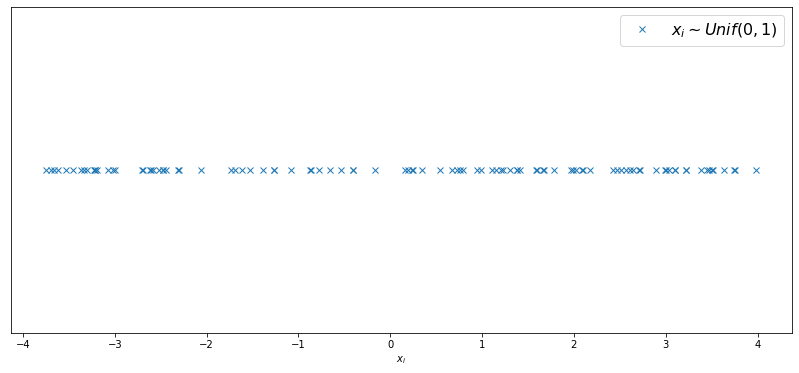

In [4]:
plt.plot(x, len(x)*[1], 'x', label = '${x_i} \sim Unif(0,1)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

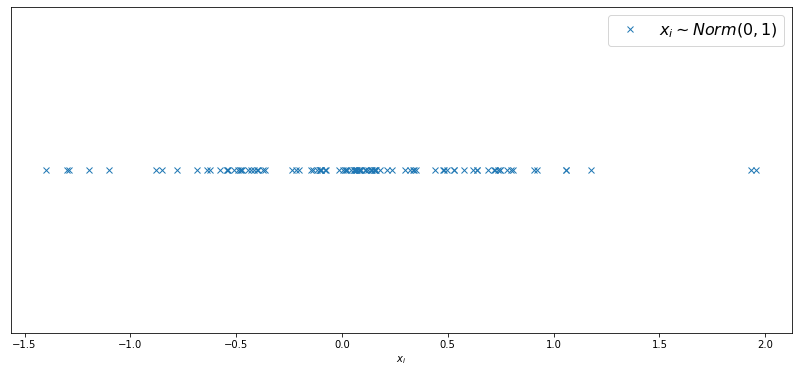

In [5]:
plt.plot(gaussian, len(gaussian)*[1], 'x', label = '${x_i} \sim Norm(0,1)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

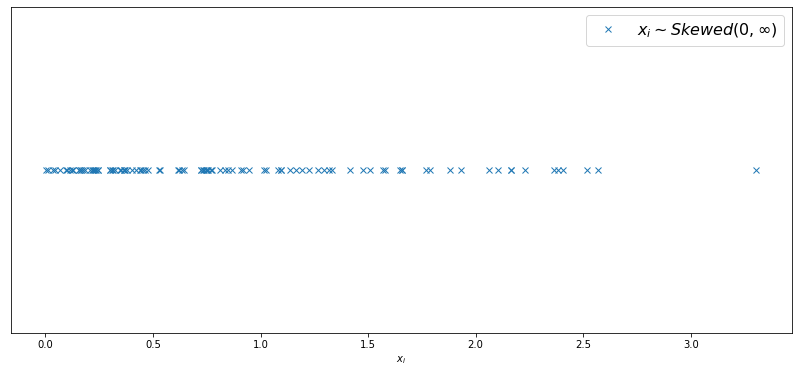

In [6]:
plt.plot(skew, len(skew)*[1], 'x', label = '${x_i} \sim Skewed(0, \infty)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

## Itens b) and c)

No idea what I'm supposed to do here...

# Exercise 2

Text(0, 0.5, 'Mean value')

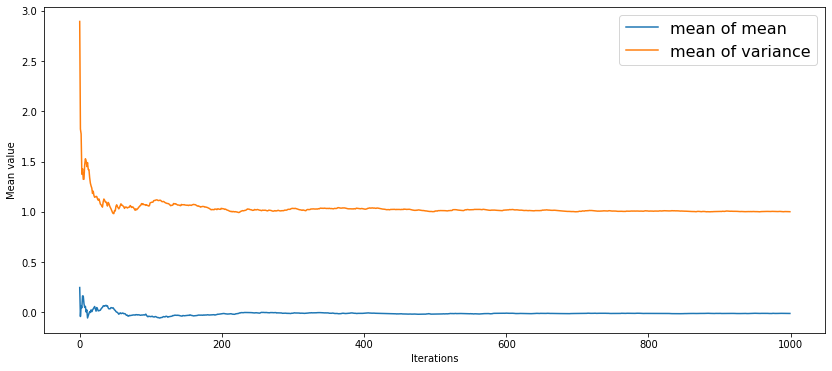

In [7]:
mu = 0
sigma = 1
N = 10

array_x = ([])
array_V = ([])

mean_x = ([])
mean_V = ([])

_t = ([])

for t in range(1000):
    _t = np.append(_t, t)
    
    #gaussian = np.random.normal(mu, sigma, 10) 
    gaussian = fs.gaussian_distribution(fs.uniform_distribution(N, -4, 4), mu, sigma)
    # Glad to see that the distribution created by me is working just as well as the one from numpy 
    
    _x = sum(gaussian)/N
    array_x = np.append(array_x, _x)
    
    mean_x = np.append(mean_x, sum(array_x)/len(array_x))
    
    _V = sum((gaussian - _x)**2)/N
    array_V = np.append(array_V, _V)
    ## This is calling for a simple implementation of these functions into the module funcs.py
    ## (☞ﾟ∀ﾟ)☞ DONE!
    
    
    mean_V = np.append(mean_V, sum(array_V)/len(array_V))
    
plt.plot(_t, mean_x, label = 'mean of mean')
plt.plot(_t, mean_V, label = 'mean of variance')
plt.legend(prop={'size': 16})

plt.xlabel('Iterations')
plt.ylabel('Mean value')

Here we se the law of large numbers in action. According to the law, the average of the results obtained from a large number of trials should be close to the expected value. As we can see, the mean value of means is closing in to the expected value $\mu$. However, the mean value of variance does not have the same behaviour... Don´t really know why **ಠ_ಠ**. 

I tested the unbiased variance, but no significant change was seen.

# Exercise 3

In [8]:
# Setting a wider graph

rcParams['figure.figsize'] = 20, 6

In [9]:
from scipy.stats import kurtosis, skew

In [10]:
# sigma = 1
# _k = ([])
# _g = ([])
# _N = np.arange(10, 100000, 1000)

# for N in _N:
#     x = fs.uniform_distribution(N, 0, 1)
#     skew_dist = fs.skewed_distribution(x, min(x), sigma)
#     _k = np.append(_k, kurtosis(skew_dist))
#     _g = np.append(_g, skew(skew_dist))

In [11]:
# plt.plot(_N, _k, label = 'Kurtosis of the Skewed Distribution')
# plt.axhspan(st.mean(_k) + 0.009,st.mean(_k) - 0.009, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
# plt.legend(prop={'size': 16})
# plt.xlabel('N')
# plt.ylabel('Kurtosis')

In [12]:
# plt.plot(_N, _g, label = 'Skewness of the Skewed Distribution')
# plt.axhspan(st.mean(_g) + 0.009,st.mean(_g) -0.009, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
# plt.legend(prop={'size': 16})
# plt.xlabel('N')
# plt.ylabel('Skewness')

# Exercise 4

## Item a)

In [13]:
mu = 0
sigma = 1

_cor = ([])
_cov = ([])
_N = ([])

try:
    
    print('Using pickled arrays')
    
    _cov= pickle.load(open(r'pickle/cov_plot.pkl', 'rb'))
    _cor = pickle.load(open(r'pickle/cor_plot.pkl', 'rb'))
    _N = np.arange(10, 1000, 1)
    
except FileNotFoundError:
    
    print('Pickle not found. Recalculating array...')

    for N in range(10, 1000):
        _N = np.append(_N, N)

        x = fs.uniform_distribution(N, 0, 1)

        gaussian = fs.gaussian_distribution(x, mu, sigma)

        _cov = np.append(_cov, st.covariance(x, gaussian))
        _cor = np.append(_cor, st.correlation(x, gaussian))
        

    with open(r'pickle/cov_plot.pkl', 'wb') as f:
        pickle.dump(_cov, f)
    with open(r'pickle/cor_plot.pkl', 'wb') as f:
        pickle.dump(_cor, f)

Using pickled arrays


Text(0, 0.5, 'Covariance')

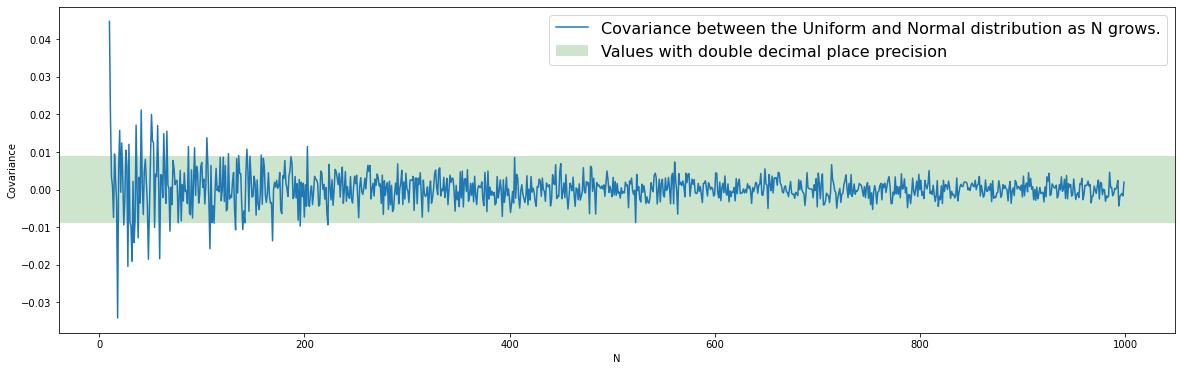

In [14]:
plt.plot(_N, _cov, label = 'Covariance between the Uniform and Normal distribution as N grows.')
plt.axhspan(0.009,-0.009, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')


Text(0, 0.5, 'Correlation')

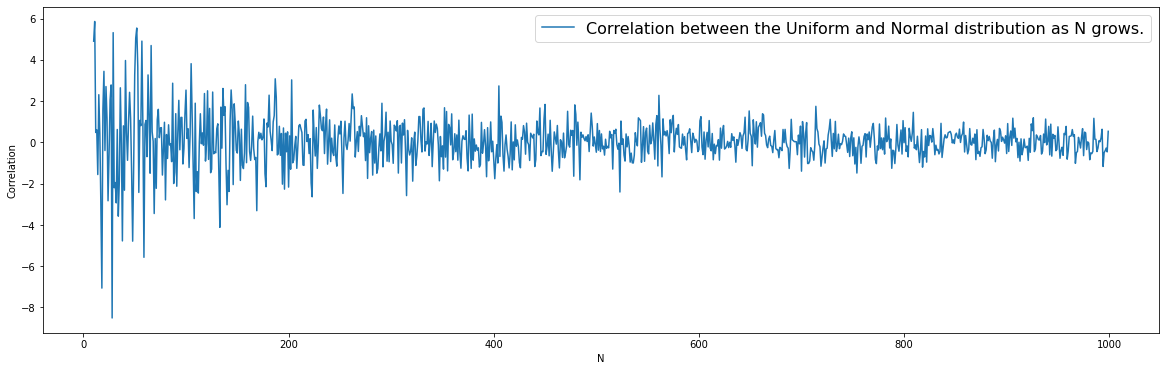

In [15]:
plt.plot(_N, _cor, label = 'Correlation between the Uniform and Normal distribution as N grows.')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

## Item b)

With $\{x_i\} \sim Unif(0,1)$ and $\{y_i\} \sim Norm(0,1)$, we shall now calculate the covariance and correlation between $\{x_i, y_i - x_i\}$ and $\{x_i, y_i + x_i\}$ respectively.

In [16]:
mu = 0
sigma = 1

_cor2 = ([])
_cov2 = ([])
_N = ([])

try:
    
    print('Using pickled arrays')
    
    _cov2 = pickle.load(open(r'pickle/cov2_plot.pkl', 'rb'))
    _cor2 = pickle.load(open(r'pickle/cor2_plot.pkl', 'rb'))
    _N = np.arange(10, 1000, 1)
    
except FileNotFoundError:
    
    print('Pickle not found. Recalculating array...')

    for N in range(10, 1000):
        _N = np.append(_N, N)

        x = fs.uniform_distribution(N, 0, 1)

        gaussian = fs.gaussian_distribution(x, mu, sigma)

        _cov2 = np.append(_cov2, st.covariance(x, gaussian - x))
        _cor2 = np.append(_cor2, st.correlation(x, gaussian - x))
        
    with open(r'pickle/cov2_plot.pkl', 'wb') as f:
        pickle.dump(_cov2, f)
    with open(r'pickle/cor2_plot.pkl', 'wb') as f:
        pickle.dump(_cor2, f)

Using pickled arrays


Text(0, 0.5, 'Covariance')

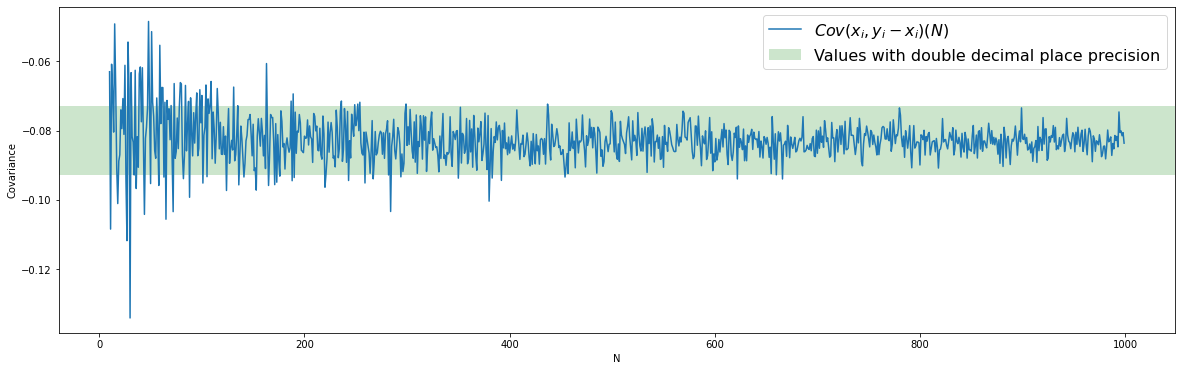

In [29]:
plt.plot(_N, _cov2, label = '$Cov(x_i, y_i - x_i)(N)$')
plt.axhspan(st.mean(_cov2) + 0.01, st.mean(_cov2)  - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')

Text(0, 0.5, 'Correlation')

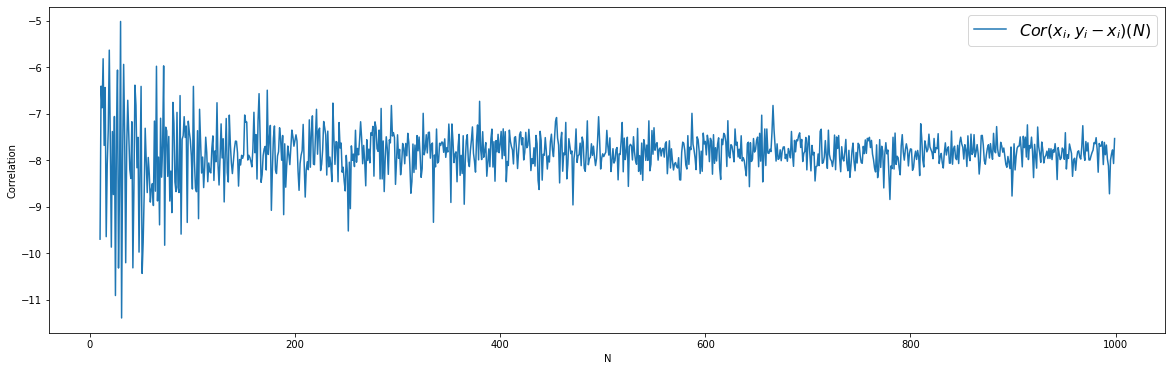

In [18]:
plt.plot(_N, _cor2, label = '$Cor(x_i, y_i - x_i)(N)$')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

In [19]:
mu = 0
sigma = 1

_cor3 = ([])
_cov3 = ([])
_N = ([])

try:
    
    print('Using pickled arrays')
    
    _cov3 = pickle.load(open(r'pickle/cov3_plot.pkl', 'rb'))
    _cor3 = pickle.load(open(r'pickle/cor3_plot.pkl', 'rb'))
    _N = np.arange(10,1000, 1)
    
except FileNotFoundError:
    
    print('Pickle not found. Recalculating array...')


    for N in range(10, 1000):
        _N = np.append(_N, N)

        x = fs.uniform_distribution(N, 0, 1)

        gaussian = fs.gaussian_distribution(x, mu, sigma)

        _cov3 = np.append(_cov3, st.covariance(x, gaussian + x))
        _cor3 = np.append(_cor3, st.correlation(x, gaussian + x))
        
    with open(r'pickle/cov3_plot.pkl', 'wb') as f:
        pickle.dump(_cov3, f)
    with open(r'pickle/cor3_plot.pkl', 'wb') as f:
        pickle.dump(_cor3, f)

Using pickled arrays


Text(0, 0.5, 'Covariance')

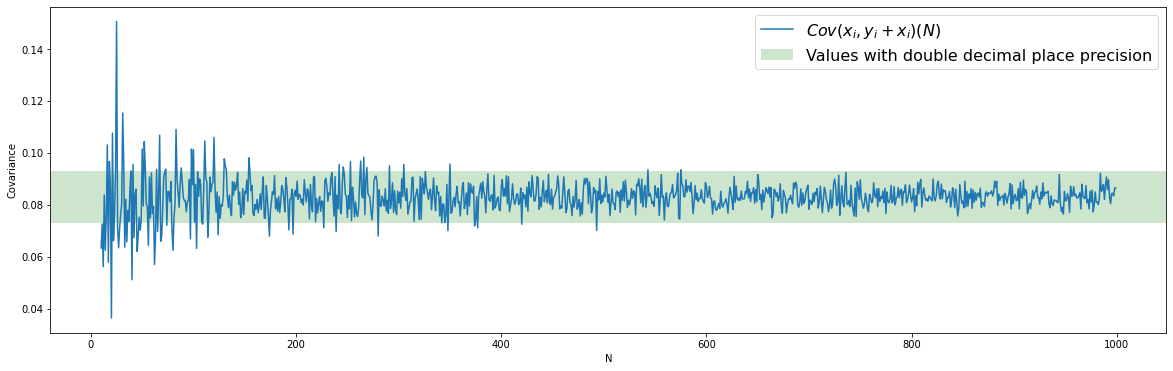

In [28]:
plt.plot(_N, _cov3, label = '$Cov(x_i, y_i + x_i)(N)$')
plt.axhspan(st.mean(_cov3) + 0.01, st.mean(_cov3)  - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')

Text(0, 0.5, 'Correlation')

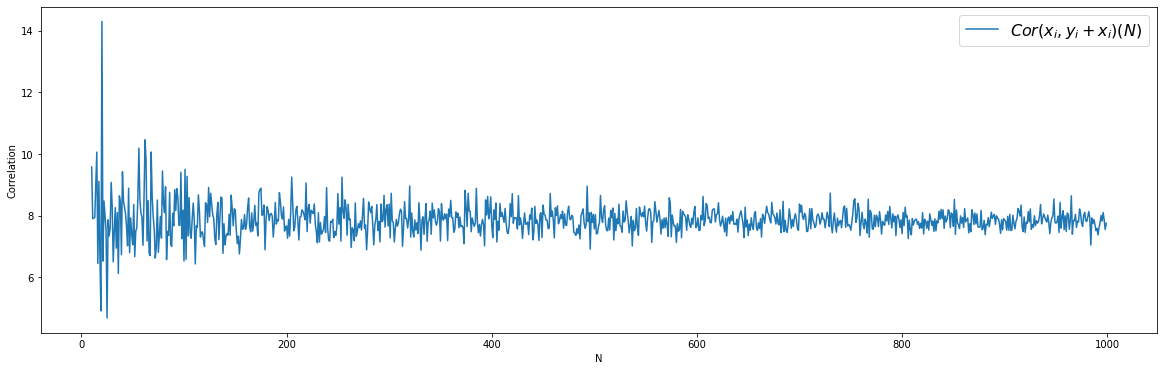

In [21]:
plt.plot(_N, _cor3, label = '$Cor(x_i, y_i + x_i)(N)$')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

## Item c)

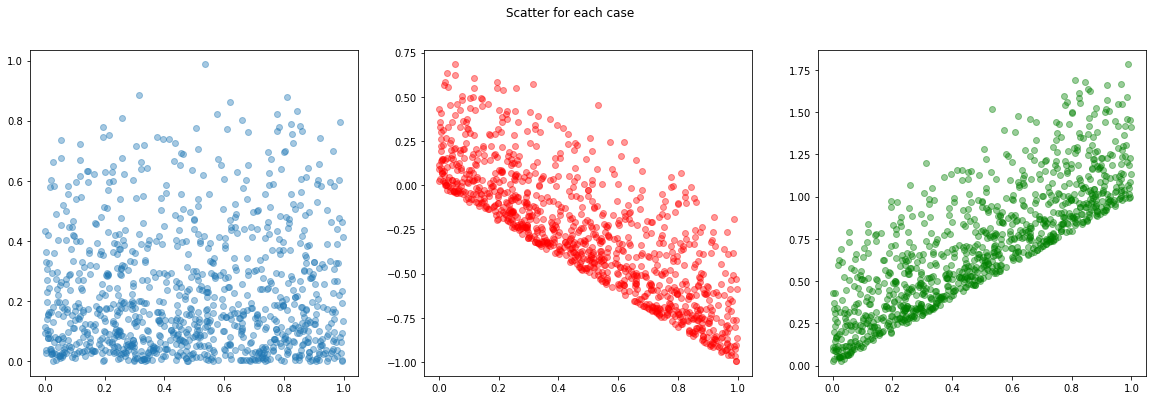

In [22]:
x = fs.uniform_distribution(1000, 0, 1)

gaussian = fs.gaussian_distribution(x, mu, sigma)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Scatter for each case')
ax1.scatter(x, gaussian, alpha = 0.4)
ax2.scatter(x, gaussian - x, c = 'r', alpha = 0.4)
ax3.scatter(x, gaussian + x, c = 'g', alpha = 0.4)

# Exercise 5

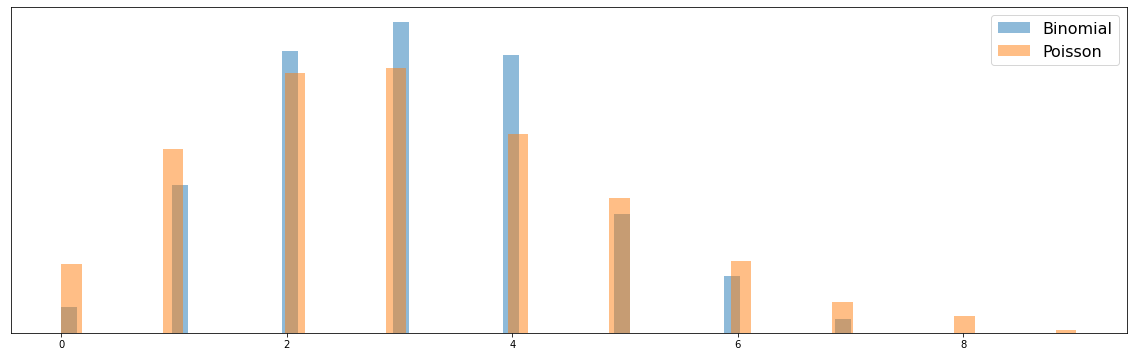

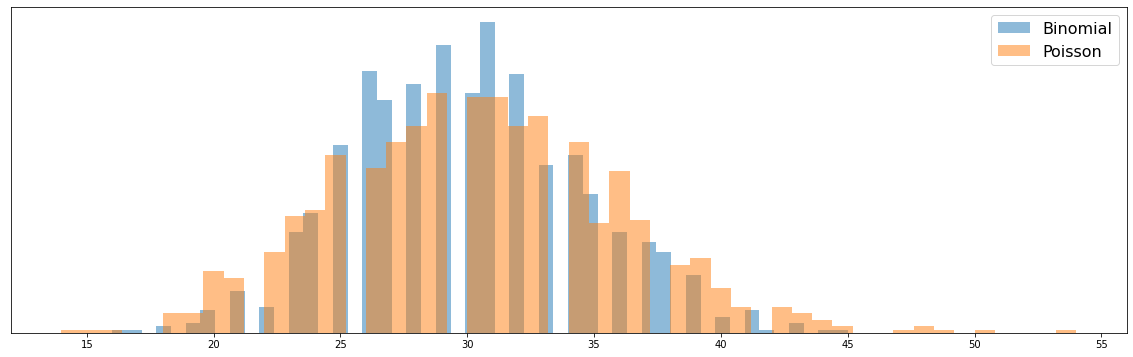

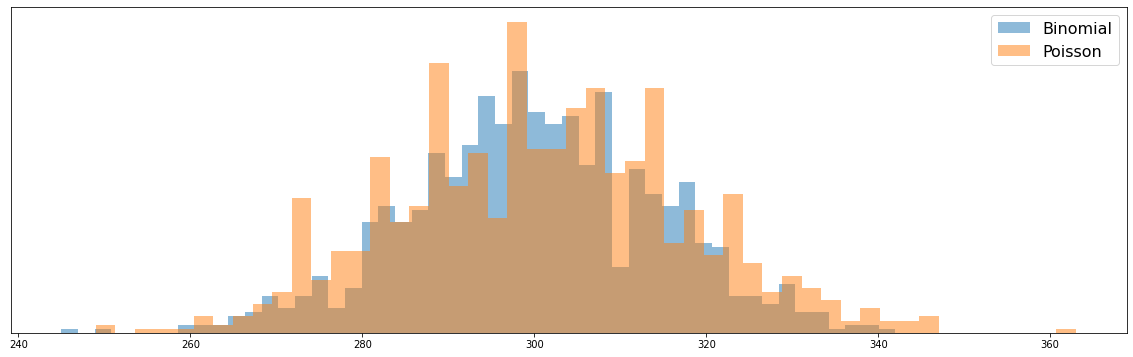

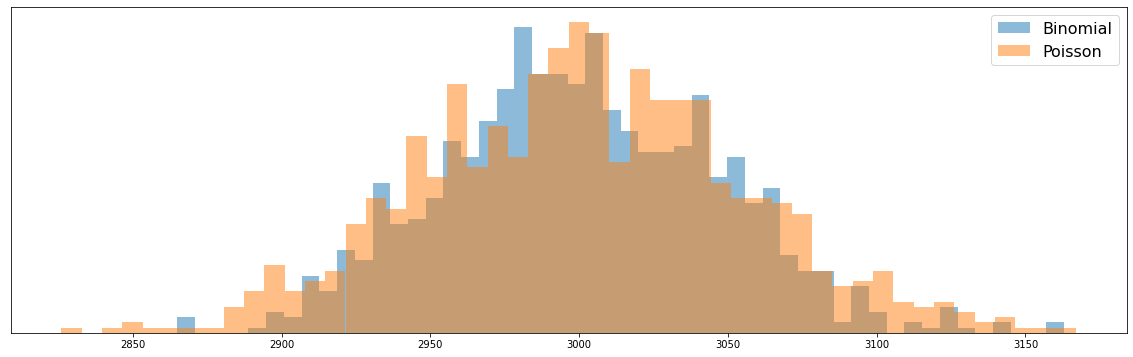

In [23]:
p = 0.3
N = 1000

for n in [10, 100, 1000, 10000]:  
    binomial = np.random.binomial(n, p, N)
    #Given lambda = p*n
    poisson = np.random.poisson(p*n, N)
    plt.hist(binomial, 50, alpha = 0.5, label = 'Binomial')
    plt.hist(poisson, 50, alpha = 0.5, label = 'Poisson')
    plt.yticks([])
    plt.legend(prop={'size': 16})
    plt.show()

The Poisson distribution is the limit of the binomial distribution
for large n.

# Exercise 6

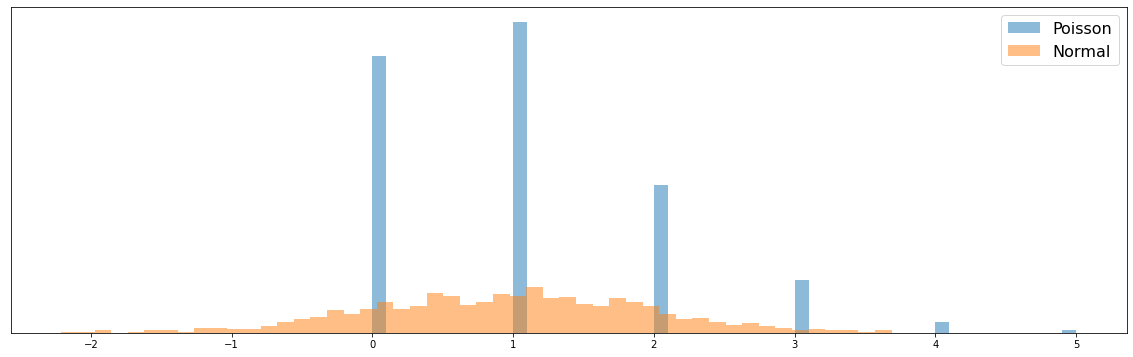

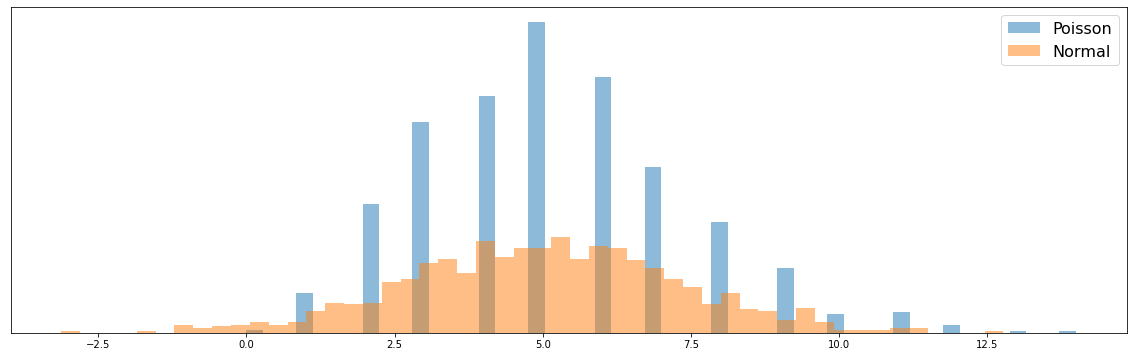

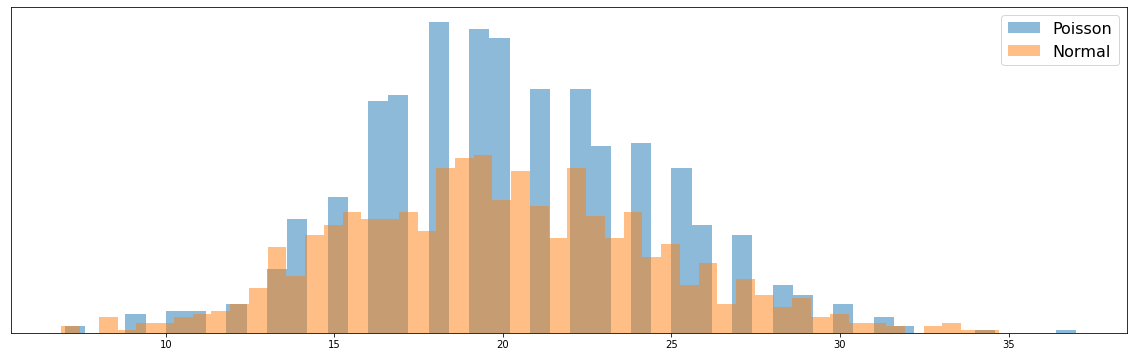

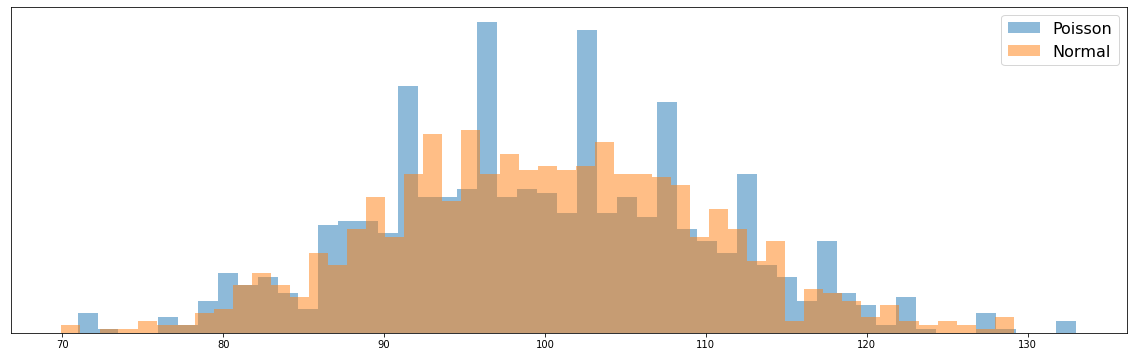

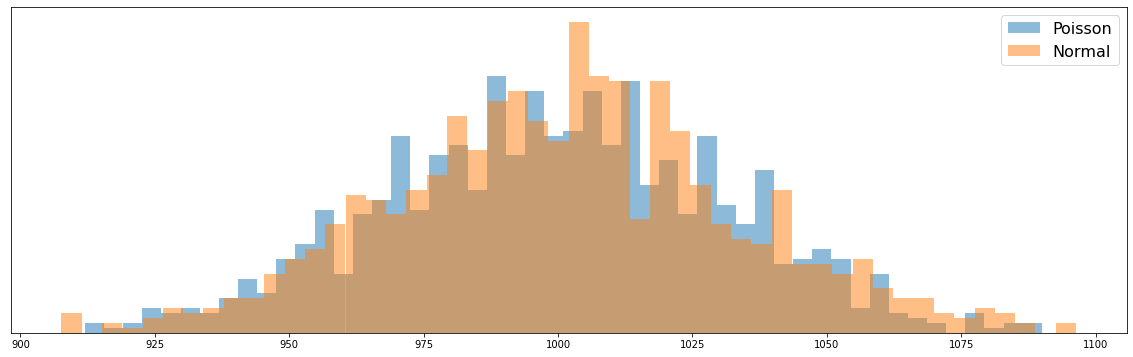

In [24]:
N = 1000

for l in [1, 5, 20, 100, 1000]:
    poisson = np.random.poisson(l, N)
    gaussian = np.random.normal(l, np.sqrt(l), N)
    plt.hist(poisson, 50, alpha = 0.5, label = 'Poisson')
    plt.hist(gaussian, 50, alpha = 0.5, label = 'Normal')
    plt.yticks([])
    plt.legend(prop={'size': 16})
    plt.show()

# Exercise 7

The multivariate integral proposed in the exercise can be solved analytically after the substitution for $\chi$. Solving the probability for any $\chi$ results in
$$
P(\chi) = 1 - e^{-\frac{\chi^2}{2}}
$$

In [25]:
def p_chi(chi):
    return 1 - np.exp((-chi**2)/2)

print(f'1-sigma: {p_chi(1)} = {round(p_chi(1)*100)}%')
print(f'2-sigma: {p_chi(2)} = {round(p_chi(2)*100)}%')
print(f'3-sigma: {p_chi(3)} = {round(p_chi(3)*100)}%')

1-sigma: 0.3934693402873666 = 39%
2-sigma: 0.8646647167633873 = 86%
3-sigma: 0.9888910034617577 = 99%


In [26]:
mu1 = 3
sigma1 = 1

mu2 = -1
sigma2 = 1

gaussian_x = np.random.normal(mu1, sigma1, 10000)
gaussian_y = np.random.normal(mu2, sigma2, 10000)

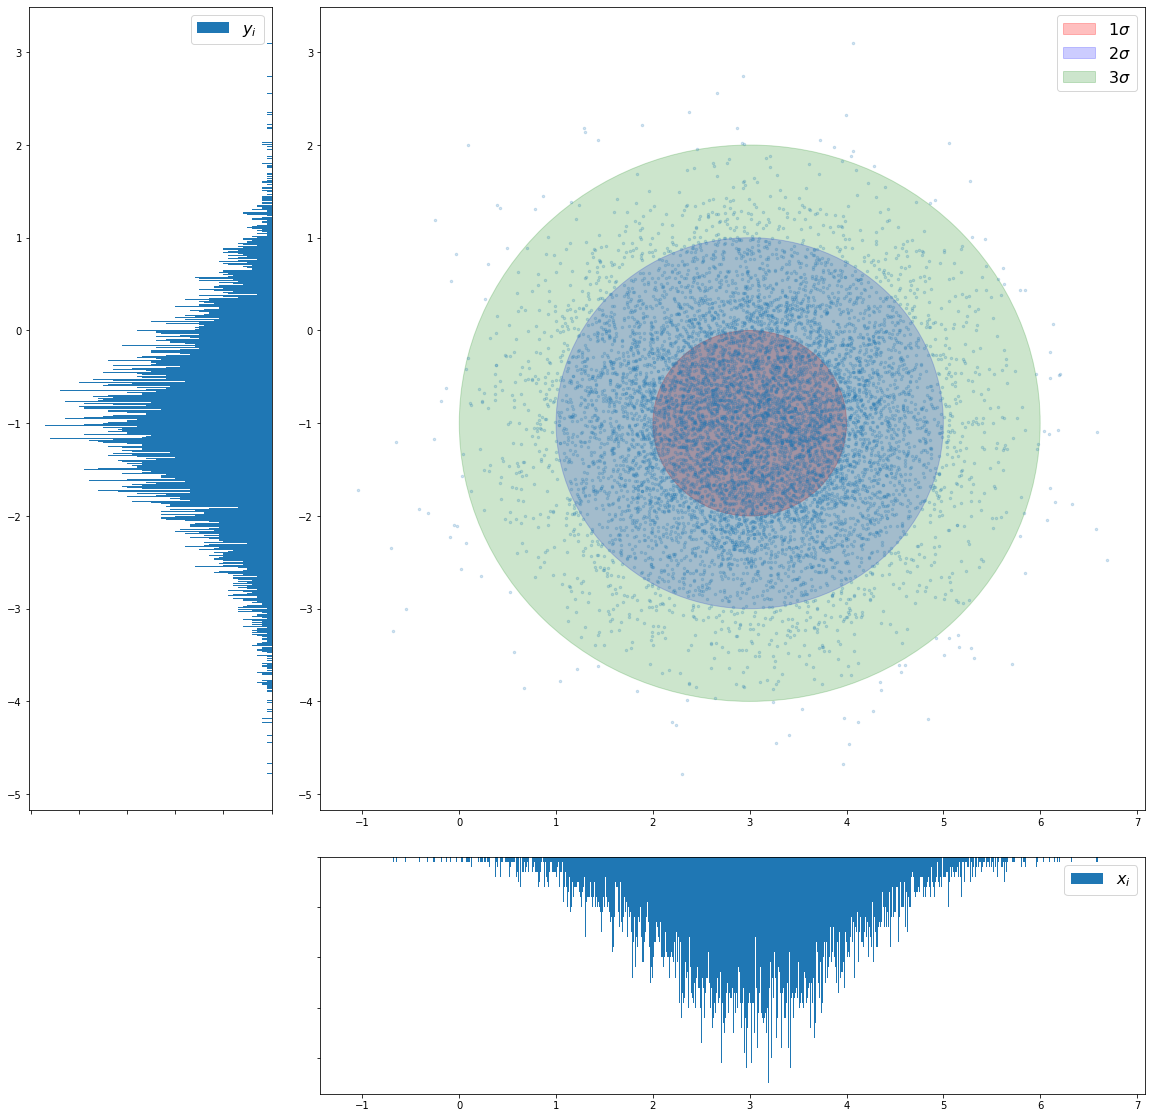

In [27]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(20, 20))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

circle1 = plt.Circle((mu1, mu2), 1, color = 'r', alpha = 0.25, label = '$1\sigma$')
circle2 = plt.Circle((mu1, mu2), 2, color = 'b', alpha = 0.2, label = '$2\sigma$')
circle3 = plt.Circle((mu1, mu2), 3, color = 'g', alpha = 0.2, label = '$3\sigma$')

# scatter points on the main axes
main_ax.add_patch(circle1)
main_ax.add_patch(circle2)
main_ax.add_patch(circle3)
main_ax.plot(gaussian_x, gaussian_y, 'o', markersize=2.5, alpha=0.2)
main_ax.legend(prop={'size': 16})

# histogram on the attached axes
x_hist.hist(gaussian_x, 1000, orientation='vertical', label = '${x_i}$')
x_hist.invert_yaxis()
x_hist.legend(prop={'size': 16})

y_hist.hist(gaussian_y, 1000, orientation='horizontal', label = '${y_i}$')
y_hist.invert_xaxis()
y_hist.legend(prop={'size': 16})